# <i class="fas fa-circle exercise"></i> Shifting pixels with spatial filters

In the following exercises, you will create filters to shift the pixels
of an image to the left, right, up or down $n$ pixels. For example, the
kernel $K_{left}$ shifts the pixels of an image 1 column to the left:

$$
K_{left}=\left[
	\begin{array}{r r r}
		0 & 0 & 0 \\
		0 & 0 & 1 \\
		0 & 0 & 0
	\end{array}
\right]
$$


In [1]:
## importing libraries
# importing libraries
from functools import partial
import random
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import skimage
from scipy.ndimage import convolve
import scipy.ndimage as sp

In [2]:
#First we load some needed functions
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray


###########################
####### show images #######
###########################
def show_images(**images):
    """Show multiple images using matplotlib."""
    # When a double-starred parameter is declared such as $**images$, then all
    # the keyword arguments from that point till the end are collected as a
    # dictionary called $'images'$.

    # Create a new matplotlib window.
    plt.figure(figsize=(10,10))

    # Set the default colormap to gray and apply to current image if any.
    plt.gray()

    # Enumarate the ID, window name and images passed as parameter.
    for (pos, (name, image)) in enumerate(images.items()):
        # Show the image in a new subplot.
        plt.subplot(2, len(images) // 2, pos + 1)
        plt.title(name)
        plt.imshow(image)

    # Show the images.
    plt.show()


In [3]:
# <!--------------------------------------------------------------------------->
# <!--                              INPUT IMAGE                              -->
# <!--------------------------------------------------------------------------->

# Input image filename.
filename = "./inputs/baboon.png"

# Loads an image and converts it to grayscale
image =plt.imread(filename)[:,:,:3]
gray = rgb2gray(image.copy())

Have a look at the function `shift_to_left()`.
Given an input image, this method uses the filter $K_{left}$ to shifts the pixels of the input image $n$ columns to left (e.g. $n=10$). It is
doing this by using $K_{left}$ $n$ times.

In [4]:
def shift_to_left(image, n):
    """Shift all pixel of the input image n column to the left."""
    result = image.copy()
    # Change this Python code.
    H = np.array([[0, 0, 0],
                  [0, 0, 1],
                  [0, 0, 0]])

    for i in range(n):
        result = convolve(result, H)
    return result




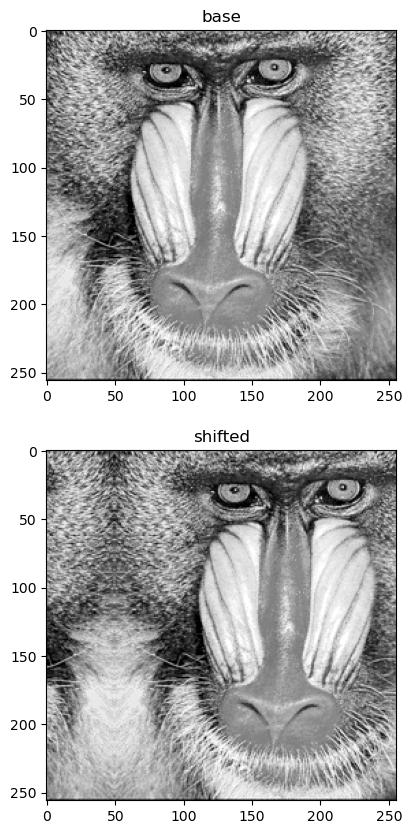

In [7]:
shifted = shift_to_left(gray, 50)
show_images(base=gray, shifted=shifted)

Answer the following:

1.  Why does $L_{left}$ shift the pixels to the left?

2.  **Improve the shift filter:** Change the function `shift_to_left()` to shift the pixels of an input image, $n$ columns to the left using a single application of `cv.filter2D` and a single kernel.

3.  **Different directions:** Make the functions `shift_to_right`, `shift_to_up, and `shift_to_down` to shift the input images $n$ pixels to the right, up and down. Use the input image to test these functions and evaluate if the images are correctly shifted.


In [6]:
def shift_to_left(image, n):
    """Shift all pixel of the input image n column to the left."""
    result = image.copy()

    n = n * 2 + 1

    H = np.zeros((n, n))
    H[(n // 2), (n - 1)] = 1
    
    result = convolve(result, H)

    return result


In [34]:
def shift_to_right(image, n):
    result = image.copy()

    n = n * 2 + 1

    H = np.zeros((n, n))
    H[(n // 2), 0] = 1
    
    result = convolve(result, H)

    return result


def shift_to_up(image, n):
    result = image.copy()

    n = n * 2 + 1

    H = np.zeros((n, n))
    H[(n - 1), (n // 2)] = 1
    
    result = convolve(result, H)

    return result

def shift_to_down(image, n):
    result = image.copy()

    n = n * 2 + 1

    H = np.zeros((n, n))
    H[0, (n // 2)] = 1
    
    result = convolve(result, H)

    return result


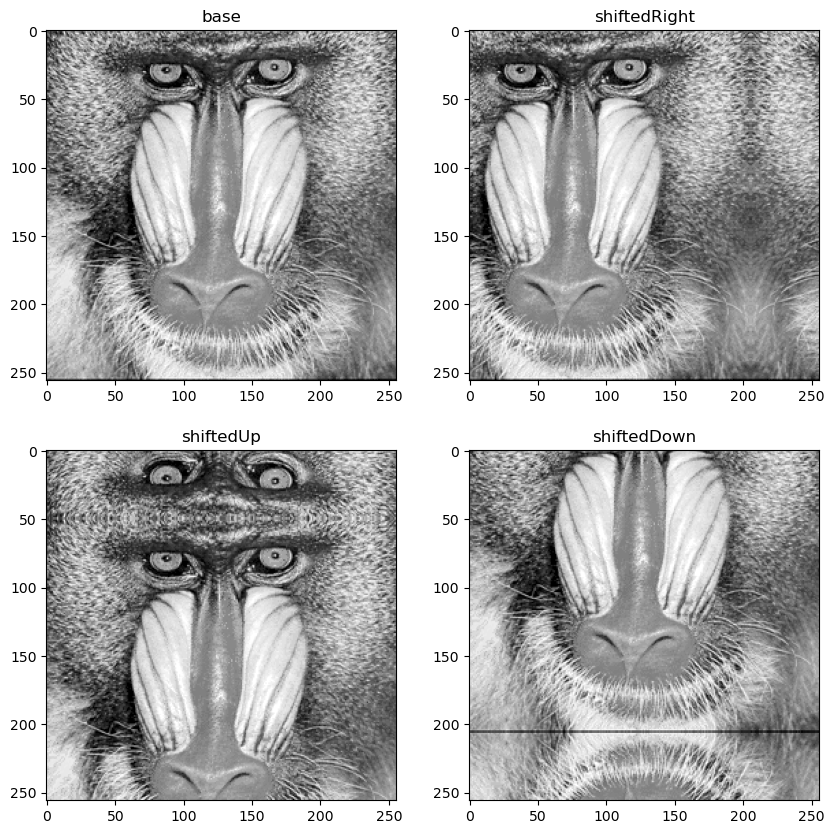

In [35]:
shiftedRight = shift_to_right(gray, 50)
shiftedUp = shift_to_up(gray, 50)
shiftedDown = shift_to_down(gray, 50)
show_images(base=gray, shiftedRight=shiftedRight, shiftedUp=shiftedUp, shiftedDown=shiftedDown)